In [1]:
from sklearn.cluster import SpectralClustering
from sklearn import datasets
from sklearn.metrics import normalized_mutual_info_score as nmi

from rsc.clustering import RSC

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, y = datasets.make_moons(600, shuffle=False, random_state=4, noise=0.1)
k = y.max()+1
nn = 15

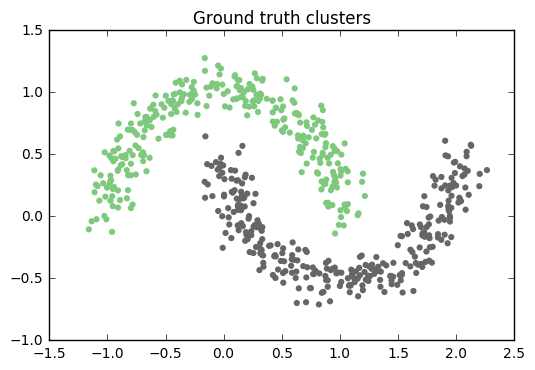

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent', linewidths=0)
plt.title('Ground truth clusters')

In [4]:
rsc = RSC(k=k, nn=nn, theta=10)
y_rsc = rsc.fit_predict(X)

sc = SpectralClustering(n_clusters=k, n_neighbors=nn+1, affinity='nearest_neighbors')  # nn+1 since they include self
y_sc = sc.fit_predict(X)

print('Vanilla Spectral Clustering NMI: {:.4f}\n Robust Spectral Clustering NMI: {:.4f}'.format(nmi(y, y_sc), nmi(y, y_rsc)))

Vanilla Spectral Clustering NMI: 0.7841
 Robust Spectral Clustering NMI: 1.0000


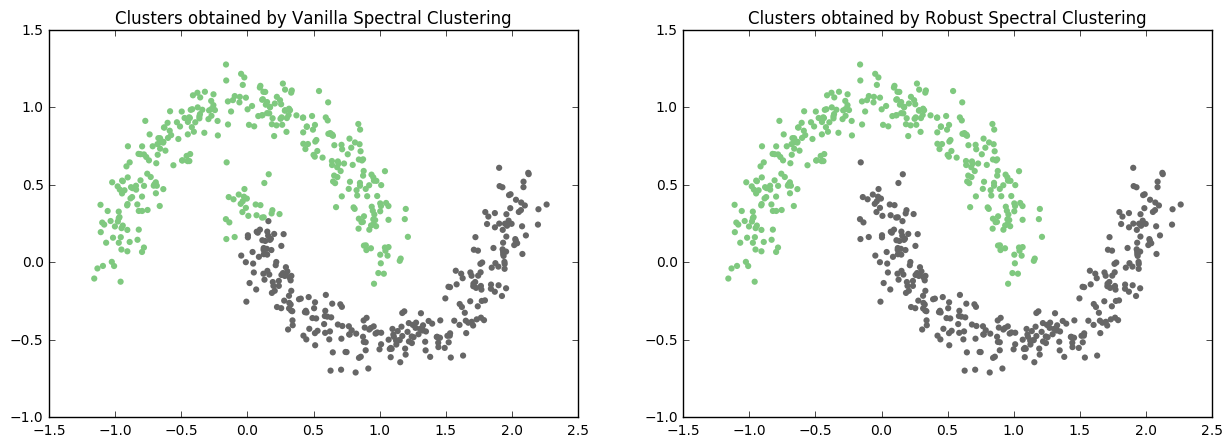

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].scatter(X[:, 0], X[:, 1], c=y_sc, cmap='Accent', linewidths=0)
ax[0].set_title('Clusters obtained by Vanilla Spectral Clustering')

ax[1].scatter(X[:, 0], X[:, 1], c=y_rsc, cmap='Accent', linewidths=0)
ax[1].set_title('Clusters obtained by Robust Spectral Clustering')